# Short Notes

read csv file and perform preprocessing task

count of species by sepal_length,sepal_width,petal_length,petal_width by applying for loop,draw bar plot using crosstab

trained given data on linear regression object to generate model

predict single element or whole dataframe and score

then determine confusion matrix and draw heatmap


# Question

df.describe()

for column in df.columns:

    if column != 'species':
    
        ct = pd.crosstab(df[column], df['species'])

In [4]:
import pandas as pd
import numpy as np
from sklearn import linear_model
import matplotlib.pyplot as plt
from matplotlib import pyplot as plt
%matplotlib inline

In [5]:
# Specify the path to your CSV file
file_path = r'R:\ML\ML nd Dl by codebasics\csv\iris.csv'

# Load the CSV file into a DataFrame
df= pd.read_csv(file_path)
df

,sepal_length,sepal_width,petal_length,petal_width,species
0,5.1,3.5,1.4,0.2,setosa
1,4.9,3.0,1.4,0.2,setosa
2,4.7,3.2,1.3,0.2,setosa
3,4.6,3.1,1.5,0.2,setosa
4,5.0,3.6,1.4,0.2,setosa
...,...,...,...,...,...
145,6.7,3.0,5.2,2.3,virginica
146,6.3,2.5,5.0,1.9,virginica
147,6.5,3.0,5.2,2.0,virginica
148,6.2,3.4,5.4,2.3,virginica


In [6]:
df.isnull().sum()

sepal_length    0
sepal_width     0
petal_length    0
petal_width     0
species         0
dtype: int64

In [7]:
df.columns

Index(['sepal_length', 'sepal_width', 'petal_length', 'petal_width',
       'species'],
      dtype='object')

In [8]:
for i in df.columns:
    print(df[i].sum())

876.5
458.1
563.8
179.8
setosasetosasetosasetosasetosasetosasetosasetosasetosasetosasetosasetosasetosasetosasetosasetosasetosasetosasetosasetosasetosasetosasetosasetosasetosasetosasetosasetosasetosasetosasetosasetosasetosasetosasetosasetosasetosasetosasetosasetosasetosasetosasetosasetosasetosasetosasetosasetosasetosasetosaversicolorversicolorversicolorversicolorversicolorversicolorversicolorversicolorversicolorversicolorversicolorversicolorversicolorversicolorversicolorversicolorversicolorversicolorversicolorversicolorversicolorversicolorversicolorversicolorversicolorversicolorversicolorversicolorversicolorversicolorversicolorversicolorversicolorversicolorversicolorversicolorversicolorversicolorversicolorversicolorversicolorversicolorversicolorversicolorversicolorversicolorversicolorversicolorversicolorversicolorvirginicavirginicavirginicavirginicavirginicavirginicavirginicavirginicavirginicavirginicavirginicavirginicavirginicavirginicavirginicavirginicavirginicavirginicavirginicavirgi

In [9]:
df.nunique()

sepal_length    35
sepal_width     23
petal_length    43
petal_width     22
species          3
dtype: int64

In [10]:
numeric_cols = df.select_dtypes(include=['number']).columns
grouped_means = df.groupby('species')[numeric_cols].mean()
grouped_means

,sepal_length,sepal_width,petal_length,petal_width
species,,,,
setosa,5.006,3.418,1.464,0.244
versicolor,5.936,2.770,4.260,1.326
virginica,6.588,2.974,5.552,2.026


In [11]:
df.describe()

,sepal_length,sepal_width,petal_length,petal_width
count,150.000000,150.000000,150.000000,150.000000
mean,5.843333,3.054000,3.758667,1.198667
std,0.828066,0.433594,1.764420,0.763161
min,4.300000,2.000000,1.000000,0.100000
25%,5.100000,2.800000,1.600000,0.300000
50%,5.800000,3.000000,4.350000,1.300000
75%,6.400000,3.300000,5.100000,1.800000
max,7.900000,4.400000,6.900000,2.500000


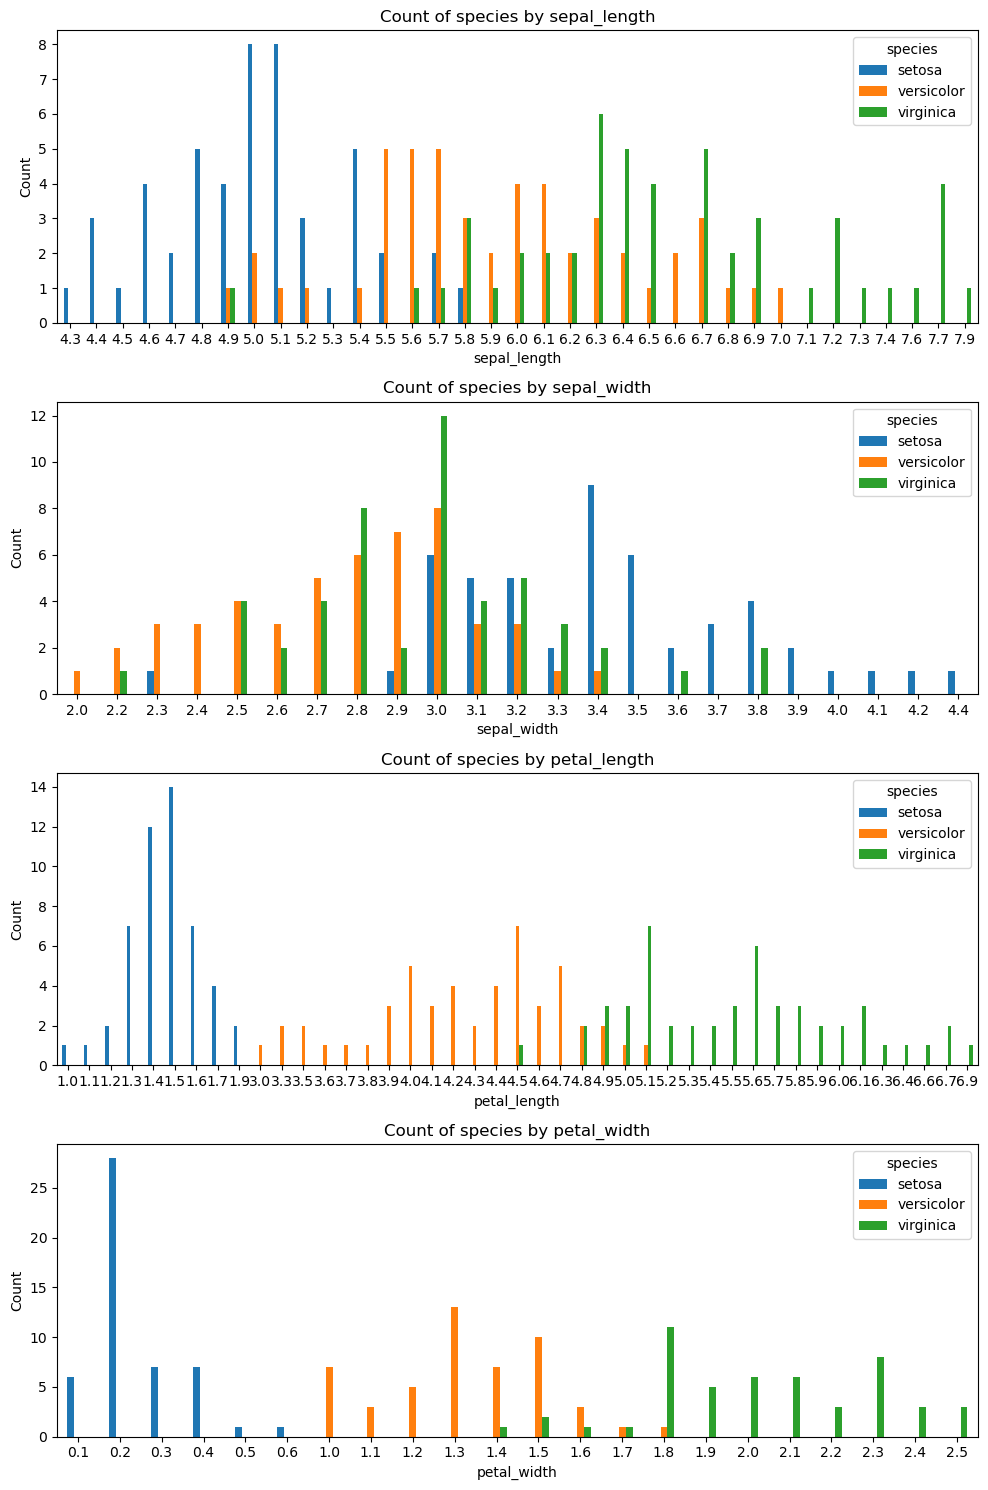

In [12]:
fig, axes = plt.subplots(nrows=4, ncols=1, figsize=(10, 15))  # Adjust figure size as necessary
ax = axes.flatten()  # Flatten the axes array for easy iteration

# Counter for the subplot index
index = 0

# Loop through each column in the DataFrame except 'left'
for column in df.columns:
    if column != 'species':  # Skip the 'left' column to avoid self-comparison
        # Generate the crosstab
        ct = pd.crosstab(df[column], df['species'])

        # Plot the crosstab on specified subplot axis
        ct.plot(kind='bar', ax=ax[index], title=f'Count of species by {column}')
        ax[index].set_xlabel(column)  # Set x-label as the current column name
        ax[index].set_ylabel('Count')  # Set y-label as 'Count'
        ax[index].set_xticklabels(ax[index].get_xticklabels(), rotation=0)  # Manage x-tick labels

        # Increment subplot index
        index += 1

# Adjust layout to prevent overlap
plt.tight_layout()

# Display all plots
plt.show()

In [13]:
subdf =df.drop('species', axis=1)
subdf.head()

,sepal_length,sepal_width,petal_length,petal_width
0,5.1,3.5,1.4,0.2
1,4.9,3.0,1.4,0.2
2,4.7,3.2,1.3,0.2
3,4.6,3.1,1.5,0.2
4,5.0,3.6,1.4,0.2


In [14]:
from sklearn.linear_model import LogisticRegression
model = LogisticRegression()

In [15]:
from sklearn.model_selection import train_test_split

In [16]:
X_train, X_test, y_train, y_test = train_test_split(subdf,df.species, test_size=0.2)

In [17]:
model.fit(X_train, y_train)

LogisticRegression()

In [18]:
model.score(X_test, y_test)

0.9333333333333333

In [19]:
model.predict(X_test)

array(['virginica', 'virginica', 'virginica', 'setosa', 'virginica',
       'versicolor', 'setosa', 'versicolor', 'setosa', 'setosa', 'setosa',
       'versicolor', 'setosa', 'versicolor', 'virginica', 'setosa',
       'setosa', 'setosa', 'virginica', 'versicolor', 'setosa',
       'virginica', 'versicolor', 'setosa', 'versicolor', 'virginica',
       'virginica', 'setosa', 'versicolor', 'setosa'], dtype=object)

In [20]:
y_predicted = model.predict(X_test)

In [21]:
from sklearn.metrics import confusion_matrix
cm = confusion_matrix(y_test, y_predicted)
cm

array([[13,  0,  0],
       [ 0,  7,  1],
       [ 0,  1,  8]], dtype=int64)

Text(95.72222222222221, 0.5, 'Truth')

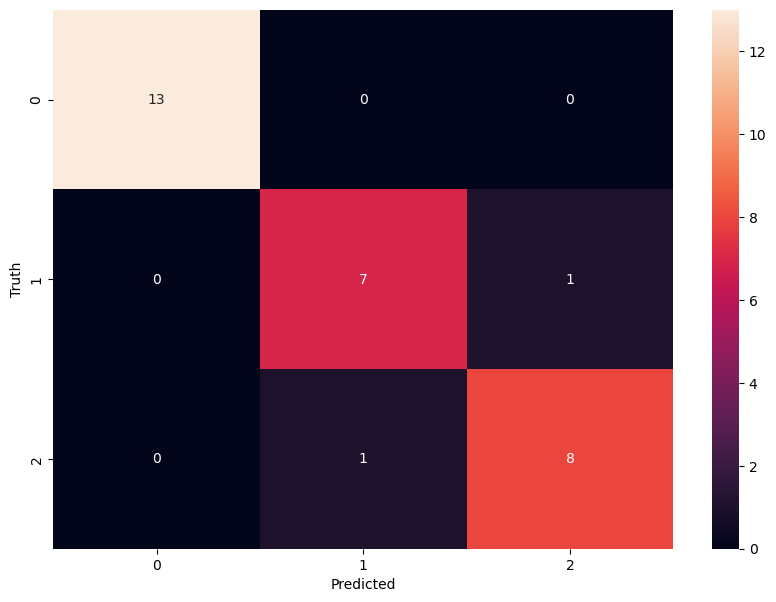

In [22]:
import seaborn as sn
plt.figure(figsize = (10,7))
sn.heatmap(cm, annot=True)
plt.xlabel('Predicted')
plt.ylabel('Truth')

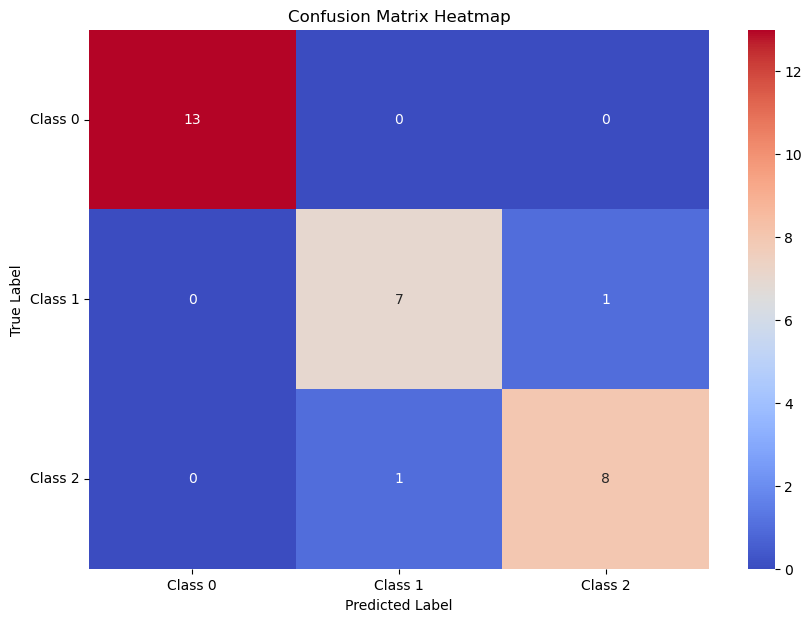

In [23]:
import seaborn as sns
import matplotlib.pyplot as plt
import numpy as np
# Creating the heatmap
plt.figure(figsize=(10, 7))  # Set the size of the figure
sns.heatmap(cm, annot=True, fmt='d', cmap='coolwarm', cbar=True)  # Annotate each cell with the numeric value

# Adding labels and title for clarity
plt.xlabel('Predicted Label')
plt.ylabel('True Label')
plt.title('Confusion Matrix Heatmap')

# Customize colorbar
cbar = plt.gcf().axes[-1]  # Get the colorbar instance of the current figure
cbar.set_label('Count of Predictions')  # Set label for colorbar

# Set tick labels visibility for smaller matrices
plt.xticks(np.arange(3) + 0.5, labels=['Class 0', 'Class 1', 'Class 2'])  # Set x-axis labels with class names
plt.yticks(np.arange(3) + 0.5, labels=['Class 0', 'Class 1', 'Class 2'], rotation=0)  # Set y-axis labels with class names

plt.show()  # Display the plot

In [24]:
#same as http://localhost:8888/notebooks/logistic_exercise.ipynb